### 1. Сгенерировать датасет при помощи sklearn.datasets.make_regression и обучить линейную модель при помощи градиентного и стохастического градиентного спуска. Нанести среднеквадратичную ошибку для обоих методов на один график, сделать выводы о разнице скорости сходимости каждого из методов.

In [1]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# сгенерируем набор данных
X, y, coef = datasets.make_regression(n_samples=1000, n_features = 2, n_informative = 2, n_targets = 1, 
                                              noise = 5, coef = True, random_state = 2)

In [3]:
# матрица признаков
X.shape 

(1000, 2)

In [4]:
# реализуем функцию, определяющую среднеквадратичную ошибку (метрика качества)
def mserror(X, w, y_pred):
    y = X.dot(w) # вектор прогнозов
    return (sum((y - y_pred)**2)) / len(y)

In [5]:
def gradient_descent(X,
                     y, 
                     mn = 20 # константа, ограничивает шаг сходимости (1/min(iter_num+1, mn)),
                             # чтобы он не стемился к нулю
                    ):
    
    #  шаг сходимости
    alpha = 0
    
    # инициализируем начальный вектор весов
    w = np.zeros(2)
    
    # список значений ошибок после каждой итерации
    errors_GD = [0,]

    # максимальное число итераций
    max_iter = 10000

    # зададим начальную разницу весов большим числом
    weight_dist = np.inf
    
    stop = 0
    
    
    # ход градиентного спуска
    for i in range (max_iter):
        alpha = 1/min(i+1, mn)
        #нормализуем данные через sign
        new_w = w - 2 * alpha * np.sign(np.dot(X.T, (np.dot(X, w) - y)) / y.shape[0])
        errors_GD.append(mserror(X, new_w, y))
        # вычислим разницу между последними значениями для реализации остановки
        stop = abs(errors_GD[-1] - errors_GD[-2]) 
        w = new_w
       
        if stop < 0.001:
            break

    return errors_GD

errors_GD = gradient_descent(X, y)
    
print(f'Функционал ошибки GD:{errors_GD[-1]}')

Функционал ошибки GD:26.437631189903797


In [6]:

def stohastic(X,
              y, 
              mn = 20 # константа, ограничивает шаг сходимости (1/min(iter_num+1, mn)),
                      # чтобы он не стемился к нулю
              ):
    
    #  шаг сходимости
    alpha = 0
    
    # инициализируем начальный вектор весов
    w = np.zeros(2)
    
    # список значений ошибок после каждой итерации
    errors_SGD = [0,]

    # максимальное число итераций
    max_iter = 10000

    # зададим начальную разницу весов большим числом
    weight_dist = np.inf
    
    stop = 0
    
    
    # ход градиентного спуска
    for i in range (max_iter):
        alpha = 1/min(i+1, mn)
        
        # генерируем случайный индекс объекта выборки
        train_ind = np.random.randint(X.shape[0])
        
        #нормализуем данные через sign
        new_w = w - 2 * alpha * np.sign(np.dot(X[train_ind].T, (np.dot(X[train_ind], w) - y[train_ind])) / y.shape[0])

        errors_SGD.append(mserror(X, new_w, y))
        
        # вычислим разницу между последними значениями для реализации остановки
        stop = abs(errors_SGD[-1] - errors_SGD[-2]) 
        w = new_w
        if stop < 0.001:
            break

    return errors_SGD

errors_SGD = stohastic(X, y, 20)
    
print(f'Функционал ошибки SGD: {errors_SGD[-1]}')

Функционал ошибки SGD: 27.13393858411658


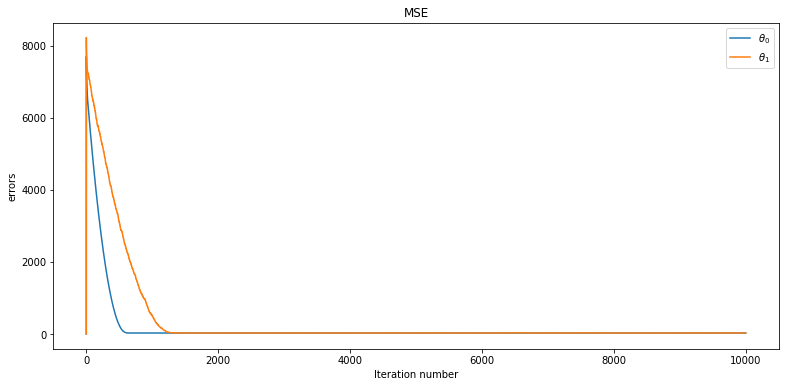

In [7]:
# Визуализируем изменение функционала ошибки
plt.figure(figsize=(13, 6))
plt.plot(range(len(errors_GD)), errors_GD, label=r'$\theta_0$')
plt.plot(range(len(errors_SGD)), errors_SGD, label=r'$\theta_1$')
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('errors')
plt.legend(loc="best")

### 2. Модифицировать решение первого задания путем добавления 𝐿2 -регуляризации (в функцию, считающую MSE, нужно добавить норму вектора весов) и сравнить результаты.m

In [8]:
alpha = 0.0001


def mserrorL2(X, w, y_pred, alpha):
    y = X.dot(w)
    return ((sum((y - y_pred)**2)) / len(y)) + (alpha * np.sum(np.square(w)))

In [9]:
errors_GD = gradient_descent(X, y)
errors_SGD = stohastic(X, y)

print(f'errors_GD: {errors_GD[-1]}, errors_SGD:{errors_SGD[-1]}')

errors_GD: 26.437631189903797, errors_SGD:26.8757144546518


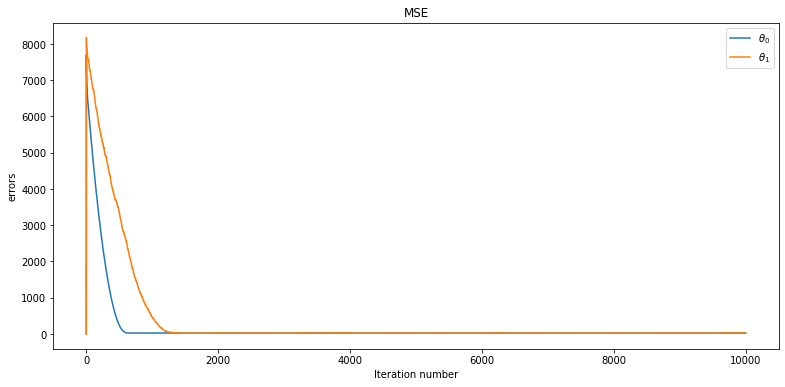

In [10]:
# Визуализируем изменение функционала ошибки
plt.figure(figsize=(13, 6))
plt.plot(range(len(errors_GD)), errors_GD, label=r'$\theta_0$')
plt.plot(range(len(errors_SGD)), errors_SGD, label=r'$\theta_1$')
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('errors')
plt.legend(loc="best")